In [0]:
from tabulate import tabulate
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from gensim.models.word2vec import Word2Vec
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import *
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

In [0]:
from bs4 import BeautifulSoup
import logging
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = "/content/gdrive/My Drive/Colab Notebooks/"
fn_path = path + "feature_text.csv"
df = pd.read_csv(fn_path)

In [0]:
df = pd.read_csv(fn_path)

In [0]:
df = df[['feature','Category']]

In [0]:
df.head(5)

,feature,Category
0,Hồ_Ngọc_Hà từng ghi dấu_ấn trong làng nhạc Việ...,nhac-pop
1,"Chiều 17 / 7 tại TP HCM , Hương Tràm tổ_chức b...",nhac-pop
2,Học_trò của Đàm_Vĩnh_Hưng vừa trình_làng mini ...,nhac-pop
3,Lệ_Quyên cho biết cô sẽ thay_đổi cách hát cũng...,nhac-pop
4,"Theo Billboard , luật_pháp Tây_Ban Nha quy_địn...",nhac-pop


In [0]:
cates = df.groupby('Category')
print("total categories:", cates.ngroups)
print(cates.size())

total categories: 28
Category
am-thuc               1341
bat-dong-san          2328
cong-nghe             3311
du-lich               2001
game                   165
gia-dinh              2042
giao-duc              2001
khoa-hoc              2001
kinh-doanh            1999
mua-sam               1122
my-thuat               193
nghe-nghiep           1619
nha-vuon              2994
nhac-pop              3628
phim                  4003
sach                  2237
song-khoe             2001
su-kien               1004
suc-khoe-y-khoa       1429
tai-chinh-ca-nhan      817
tam-linh               868
the-thao              2001
thoi-quen-so-thich     316
thoi-su               2001
thoi-trang            3089
thu-cung               393
truyen-hinh           3061
xe                    1698
dtype: int64


In [0]:
def clean_str(s):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    s = s.replace("_"," ")

    return s

In [0]:
for idx in range(df.feature.shape[0]):
    df.feature[idx] = clean_str(df.feature[idx])

In [0]:
df.head(5)

,feature,Category
0,Hồ Ngọc Hà từng ghi dấu ấn trong làng nhạc Việ...,nhac-pop
1,"Chiều 17 / 7 tại TP HCM , Hương Tràm tổ chức b...",nhac-pop
2,Học trò của Đàm Vĩnh Hưng vừa trình làng mini ...,nhac-pop
3,Lệ Quyên cho biết cô sẽ thay đổi cách hát cũng...,nhac-pop
4,"Theo Billboard , luật pháp Tây Ban Nha quy địn...",nhac-pop


In [0]:
!pip install pyvi

import pandas as pd
from joblib import load,dump
import requests
import numpy as np
from pyvi import ViPosTagger, ViTokenizer

     |████████████████████████████████| 8.8MB 1.3MB/s 
     |████████████████████████████████| 747kB 51.0MB/s 


In [0]:
des_name = path + "new_text.csv"

In [0]:
new_data = df.to_csv(des_name)

In [0]:
def makelower(row):
  return row.feature.lower()

In [0]:
"""============"""
def read_stopwords(filePath):
  """ đọc file stopwords """
  with open(filePath, 'r', encoding="utf8") as f:
    stopwords = set([w.strip().replace(' ', '_') for w in f.readlines()])
  return stopwords

In [0]:
"""============"""
def transformtext(content):
  text_idf = ViPosTagger.postagging(ViTokenizer.tokenize(content.feature.lower()))
  tokens = text_idf[0]
  tags = text_idf[1]
  removeListTag = ['F','X']
  wordlist = []
  for index in range(0, len(tokens)):
    if tags[index] not in removeListTag:
      wordlist.append(tokens[index])
      for word in stop_words:
        if word in wordlist:
          wordlist.remove(word)
  
  text_idf = ''
  text_idf = ' '.join(wordlist)
  del(wordlist)
  return text_idf

In [0]:
# df["new_feature"] = df.apply(makelower,axis=1)

In [0]:
df["new_feature"] = df.apply(transformtext,axis=1)

In [0]:
des_name_2 = path + "new_final_text.csv"
df.to_csv(des_name_2)

In [0]:
### trying  : remove number, remove special character , remove Noun , remove english ... 
### add data train more label
### merege some label

In [0]:
df.head(5)

,feature,Category,new_feature
0,Hồ_Ngọc_Hà từng ghi dấu_ấn trong làng nhạc Việ...,nhac-pop,hồ_ngọc_hà từng ghi dấu_ấn trong làng nhạc việ...
1,"Chiều 17 / 7 tại TP HCM , Hương Tràm tổ_chức b...",nhac-pop,"chiều 17 / 7 tại tp hcm , hương tràm tổ_chức b..."
2,Học_trò của Đàm_Vĩnh_Hưng vừa trình_làng mini ...,nhac-pop,học_trò của đàm_vĩnh_hưng vừa trình_làng mini ...
3,Lệ_Quyên cho biết cô sẽ thay_đổi cách hát cũng...,nhac-pop,lệ_quyên cho biết cô sẽ thay_đổi cách hát cũng...
4,"Theo Billboard , luật_pháp Tây_Ban Nha quy_địn...",nhac-pop,"theo billboard , luật_pháp tây_ban nha quy_địn..."


In [0]:
# generate txt 

In [0]:
from gensim.models import word2vec


In [0]:
## convert bin to txt

In [0]:
file_bin = "baomoi.window2.vn.model.bin"

In [0]:
fn  = path + file_bin

In [0]:
des_fn = path + "baomoi.window2.vn.model.txt"

In [0]:
from gensim.models.keyedvectors import KeyedVectors
# model = KeyedVectors.load_word2vec_format(fn, binary=True)
# model.save_word2vec_format(des_fn, binary=False)

In [0]:
df = df.dropna()

In [0]:
mult_nb = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("multinomial nb", MultinomialNB())])
bern_nb = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("bernoulli nb", BernoulliNB())])
mult_nb_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("multinomial nb", MultinomialNB())])
bern_nb_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("bernoulli nb", BernoulliNB())])
# SVM - which is supposed to be more or less state of the art 
http://www.cs.cornell.edu/people/tj/publications/joachims_98a.pdf
svc = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("linear svc", SVC(kernel="linear"))])
svc_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("linear svc", SVC(kernel="linear"))])

In [0]:
X, y = [], []
arrText = df['new_feature'].values.tolist()
arrLabel = df['Category'].values.tolist()

In [0]:
X, y = [], []
for line in arrText:
    X.append(line.split())
for lb in arrLabel:
    y.append(lb)
X, y = np.array(X), np.array(y)
print ("total examples %s" % len(y))


total examples 51663


In [0]:
## pretrain model w2v

In [0]:
model = Word2Vec(X, size=100, window=5, min_count=5, workers=2)
w2v = {w: vec for w, vec in zip(model.wv.index2word, model.wv.syn0)}

In [0]:
name_w2v = path + 'baomoi.window2.vn.model.txt'

In [0]:
encoding="utf-8"
all_words = set(w for words in X for w in words)

In [0]:
glove_small = {}
with open(name_w2v, "rb") as infile:
    for line in infile:
        parts = line.split()
        word = parts[0].decode(encoding)
        if word in all_words:
            nums=np.array(parts[1:], dtype=np.float32)
            glove_small[word] = nums

In [0]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        if len(word2vec)>0:
            self.dim=len(word2vec[next(iter(glove_small))])
        else:
            self.dim=0
            
    def fit(self, X, y):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

    
# and a tf-idf version of the same
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        if len(word2vec)>0:
            self.dim=len(word2vec[next(iter(glove_small))])
        else:
            self.dim=0
        
    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf, 
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])
    
        return self
    
    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [0]:
all_models = [

    ("svc", svc),
    ("svc_tfidf", svc_tfidf),
    ("glove_small", etree_baomoi_small), 
    ("glove_small_tfidf", etree_baomoi_small_tfidf),
    ("w2v", etree_w2v),
    ("w2v_tfidf", etree_w2v_tfidf)
]

unsorted_scores = [(name, cross_val_score(model,X,y, cv=5).mean()) for name, model in all_models]
scores = sorted(unsorted_scores, key=lambda x: -x[1])


print (tabulate(scores, floatfmt=".4f", headers=("model", 'score')))

model                score
-----------------  -------
svc_tfidf           0.8961
w2v_tfidf           0.8159
glove_small_tfidf   0.8134
glove_small         0.8083


In [0]:
print (tabulate(scores, floatfmt=".4f", headers=("model", 'score')))

model                score
-----------------  -------
svc_tfidf           0.8961
w2v_tfidf           0.8159
glove_small_tfidf   0.8134
glove_small         0.8083


In [0]:
"""============"""
def read_stopwords(filePath):
  """ đọc file stopwords """
  with open(filePath, 'r', encoding="utf8") as f:
    stopwords = set([w.strip().replace(' ', '_') for w in f.readlines()])
  return stopwords


In [0]:
def benchmark(model, X, y, n):
    test_size = 1 - (n / float(len(y)))
    scores = []
    sss = StratifiedShuffleSplit(n_splits=5, test_size=test_size, random_state=0)
    
    for train_index, test_index in sss.split(X, y):
    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        scores.append(accuracy_score(model.fit(X_train, y_train).predict(X_test), y_test))
    return np.mean(scores)

In [0]:
train_sizes = [40, 160, 640, 3200, 6400,12800]
table = []
for name, model in all_models:
#     print (name)
#     print (model)
    for n in train_sizes:
        print(n)
        table.append({'model': name, 
                      'accuracy': benchmark(model, X, y, n), 
                      'train_size': n})
df = pd.DataFrame(table)

[Text(0, 0.5, 'accuracy')]

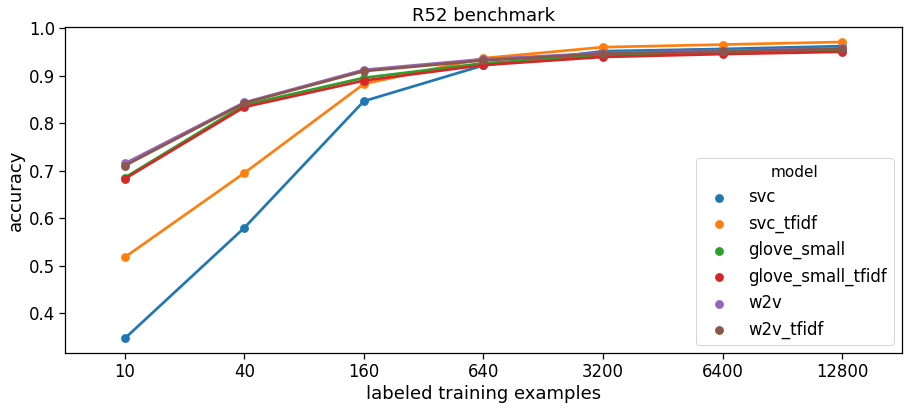

In [0]:

plt.figure(figsize=(15, 6))
fig = sns.pointplot(x='train_size', y='accuracy', hue='model', 
                    data=df[df.model.map(lambda x: x in ["svc", "svc_tfidf","glove_small",
                                                         "glove_small_tfidf","w2v","w2v_tfidf"])])
sns.set_context("notebook", font_scale=1.5)
fig.set(ylabel="accuracy")
fig.set(xlabel="labeled training examples")
fig.set(title="model benchmark")
fig.set(ylabel="accuracy")

In [0]:
###test